In [1]:
"""Test the radiosity.Radiosity module."""
import numpy as np
import pyfar as pf
import sparapy as sp
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib ipympl

In [2]:
X = 5
Y = 6
Z = 4
patch_size = 0.5
ir_length_s = 2
sampling_rate = 1000
max_order_k = 60
speed_of_sound = 346.18

absorption = 0.1
S = (2*X*Y) + (2*X*Z) + (2*Y*Z)
A = S*absorption
alpha_dash = A/S
r_h = 1/4*np.sqrt(A/np.pi)
print(f'reverberation distance is {r_h}m')
V = X*Y*Z
RT = 24*np.log(10)/(speed_of_sound)*V/(-S*np.log(1-alpha_dash))
print(f'reverberation time is {RT}s')
# create geometry
walls = sp.testing.shoebox_room_stub(X, Y, Z)
source_pos = [2, 2, 2]
source = sp.geometry.SoundSource(source_pos, [0, 1, 0], [0, 0, 1])
receiver_pos = [2, 3, 2]
## new approach
radi = sp.radiosity.Radiosity(
    walls, patch_size, max_order_k, ir_length_s,
    speed_of_sound=speed_of_sound, sampling_rate=sampling_rate)

radi_new = sp.DRadiosityFast.from_polygon(walls, patch_size)
sources = pf.Coordinates(0, 0, 1)
receivers = pf.Coordinates(0, 0, 1)
frequencies = np.array([500])
data_scattering = pf.FrequencyData(
    np.ones((sources.csize, receivers.csize, frequencies.size)), frequencies)

radi_new.set_wall_scattering(
    np.arange(len(walls)), data_scattering, sources, receivers)
radi_new.set_air_attenuation(
    pf.FrequencyData(
        np.zeros_like(data_scattering.frequencies),
        data_scattering.frequencies))
radi_new.set_wall_absorption(
    np.arange(len(walls)),
    pf.FrequencyData(
        np.zeros_like(data_scattering.frequencies)+absorption,
        data_scattering.frequencies))

reverberation distance is 0.5426201661567753m
reverberation time is 1.228475783983933s


D:\git\_pyfar\sparapy\sparapy\radiosity.py:60: RuntimeWarning: invalid value encountered in divide
  real_size = size/patch_nums
C:\Users\heimes\AppData\Local\Temp\ipykernel_24536\841666457.py:36: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi_new.set_wall_scattering(


In [3]:
# run simulation
radi.run(source)


100%|██████████| 60/60 [14:18<00:00, 14.31s/it]


In [4]:
# test energy at receiver
receiver = sp.geometry.Receiver(receiver_pos, [0, 1, 0], [0, 0, 1])
ir_nindi = radi.energy_at_receiver(receiver, ignore_direct=True)


In [5]:
radi_new.bake_geometry(algorithm='order')


In [6]:
radi_new.init_source_energy(source_pos, algorithm='order')


In [7]:

ir_order = radi_new.calculate_energy_exchange_receiver(
    receiver_pos, speed_of_sound=speed_of_sound,
    histogram_time_resolution=1/sampling_rate, histogram_length=ir_length_s,
    algorithm='order', max_depth=max_order_k)


In [8]:

reverberation_nindi = pf.Signal(ir_nindi, sampling_rate=sampling_rate)
reverberation_order = pf.Signal(ir_order, sampling_rate=sampling_rate)

In [9]:
for i  in ir_order[0]:
    print(10*np.log10(i))

-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-22.457532380704514
-26.279527511832708
-21.32304053642821
-26.30876944142568
-25.223539958249034
-26.112420857735348
-25.867482663469335
-26.313204648110393
-25.785742699087123
-26.547866508257837
-25.831306318131382
-26.10071260241248
-26.02874543184424
-26.047683209747174
-26.060578521909807
-26.41815643023152
-26.50429398012014
-26.62371158662531
-26.54867871030862
-26.553573096129647
-26.451373748567022
-26.624011604454164
-26.59936499342582
-26.73153102867946
-26.74752575854913
-26.78910593633351
-26.810177171562962
-26.852291239534317
-26.88019160155728
-26.94093888680181
-26.981216532880264
-27.034392654050308
-27.095405894689804
-27.164903108921763
-27.230341522535568
-27.286650188163662
-27.332226449894755
-27.37551226597525
-27.41546731481213
-27.459355986182498
-27.50440947753694
-27.557023747390627
-27.6087993759579
-27.662439272087006
-27.71479880388283
-27.76834676573177
-27.82093524492486
-27.87220368554125
-27

C:\Users\heimes\AppData\Local\Temp\ipykernel_24536\1803358052.py:2: RuntimeWarning: divide by zero encountered in log10
  print(10*np.log10(i))


In [10]:
for i  in ir_nindi[0]:
    print(10*np.log10(i))

-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-22.457532380704514
-26.279527511832708
-21.32304053642821
-26.30876944142568
-25.223552861694362
-26.112497568273017
-25.867730520552612
-26.317905745246403
-25.776469442220545
-26.55473798462449
-25.831816699862827
-26.098926760086016
-26.025455986087202
-26.04723396841886
-26.058799600136982
-26.417745084297536
-26.503493296397483
-26.624029079033413
-26.548502938436442
-26.55461149671965
-26.453490881055593
-26.626526634941115
-26.601038300443314
-26.732715113413295
-26.748006708557227
-26.78992372983729
-26.81078804686457
-26.85302024712689
-26.88030526333899
-26.941222913369277
-26.981742180413953
-27.035208790615304
-27.096451385278748
-27.16607385846492
-27.2315370032209
-27.287859059142686
-27.333434602671552
-27.376788266407573
-27.416761064057553
-27.46064967278489
-27.505654725553008
-27.55826281163159
-27.610045237037752
-27.663724700963538
-27.71608546318992
-27.769630990927364
-27.822219394803152
-27.87352161000841
-

C:\Users\heimes\AppData\Local\Temp\ipykernel_24536\3863764540.py:2: RuntimeWarning: divide by zero encountered in log10
  print(10*np.log10(i))


In [11]:

E_reverb_analytical = 4/A


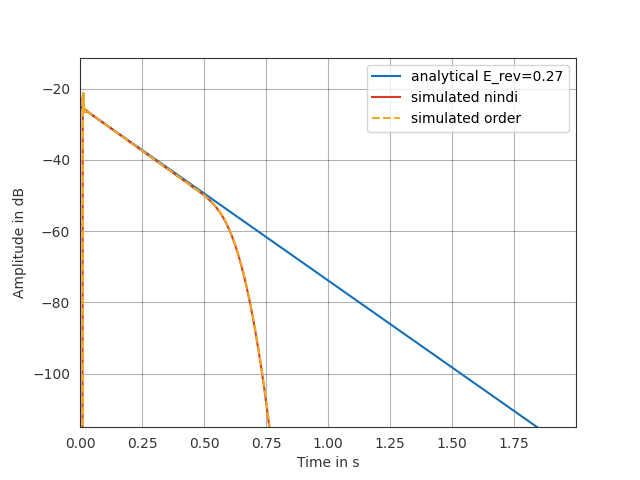

In [13]:
t = reverberation_order.times
w_0 = E_reverb_analytical/ V # Kuttruff Eq 4.7
t_0 = 0.03
reverberation_analytic = w_0 * np.exp(+(speed_of_sound*S*np.log(1-alpha_dash)/(4*V))*(t-t_0)) # Kuttruff Eq 4.10
reverberation_analytic = pf.Signal(reverberation_analytic, sampling_rate=sampling_rate)
plt.figure()
pf.plot.time(
    reverberation_analytic, dB=True, log_prefix=10,
    label=f'analytical E_rev={E_reverb_analytical:0.2f}')
pf.plot.time(
    reverberation_nindi, dB=True, log_prefix=10,
    label='simulated nindi',
    linestyle='-')
pf.plot.time(
    reverberation_order, dB=True, log_prefix=10,
    label='simulated order',
    linestyle='--')

plt.legend()
plt.show()